In [49]:
import os
import sys
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

## Running visualize_registration.py

In [192]:
# THIS RUNS visualize_registration_DEV.py
stack = 'MD585'

fn = stack+'_visualization_global_alignment_spec.json'
data = {}

data["stack_m"] ={
        "name":"atlasV7",
        "vol_type": "score",
        "resolution":"10.0um"
        }
data["stack_f"] ={
    "name":stack, 
    "vol_type": "score", 
    "resolution":"10.0um",
    "detector_id":19
    }
data["warp_setting"] = 0

with open(fn, 'w') as outfile:
    json.dump(data, outfile)

# Reads data from:
#   demo_visualization_per_structure_alignment_spec.json
#   demo_visualization_global_alignment_spec.json

fn_vis_structures = stack+'_visualization_per_structure_alignment_spec.json'
fn_vis_global = stack+'_visualization_global_alignment_spec.json'

start_time = time.time()
    
# If Ntb
# ! python visualize_registration.py NtbNormalizedAdaptiveInvertedGamma \
# demo_visualization_per_structure_alignment_spec.json \
# -g demo_visualization_global_alignment_spec.json
# If Thionin
! python visualize_registration_DEV.py grayJpeg $fn_vis_structures -g $fn_vis_global

print('Took ',time.time()-start_time, 'Seconds')

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'MD589': 0.46, 'MD585': 0.46, 'UCSD001': 0.325}
No mcubes
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache DK1-2 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_d

## How to Load SimpleGlobal and Local Volumes

In [55]:
# LOAD GLOBAL AND LOCAL VOLUMES + XYZ OFFSETS
structure = '12N'
stack = 'MD585'


# Load local transformed volumes
str_alignment_spec = load_json(fn_vis_structures)[structure]
local_vo = DataManager.load_transformed_volume_v2(alignment_spec = str_alignment_spec, 
                                                return_origin_instead_of_bbox = True,
                                               structure = structure)
print 'COMPLEX GLOBAL VOLUMES'
print np.shape(local_vo[0])
print local_vo[1]
print local_vo[0][40][70][:] 


# Load simple global volumes
global_alignment_spec = load_json(fn_vis_global)
simpleGlobal_vo = DataManager.load_transformed_volume_v2(alignment_spec = global_alignment_spec, 
                                                             return_origin_instead_of_bbox = True,
                                                            structure = structure)
print '\nSIMPLE GLOBAL VOLUMES'
print np.shape(simpleGlobal_vo[0])
print simpleGlobal_vo[1]
print simpleGlobal_vo[0][40][70][:] 

COMPLEX GLOBAL VOLUMES
(77, 142, 108)
[1301.  537.  345.]
[0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.01176471 0.03529412 0.07058824 0.09411765
 0.16078431 0.30588235 0.40392157 0.50196078 0.54117647 0.65098039
 0.74509804 0.82745098 0.88627451 0.94509804 0.96862745 0.98431373
 0.99215686 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.99607843 0.99215686 0.99215686 0.98823529 0.99215686
 0.99215686 0.99215686 0.99215686 0.98431373 0.99215686 0.99215686
 0.99215686 0.99215686 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.99607843 0.99607843 0.99607843 0.99215686 0.98823529
 0.97647059 0.96078431 0.9372549  0.90196078 0.85882353 0.81960784
 0.76470588 

## How to Load SimpleGlobal and Local Volumes

In [185]:
def image_contour_generator(stack,structure,use_local_alignment = True,image_prep = 2, threshold=0.5):

    if use_local_alignment:
        # Load local transformed volumes
        str_alignment_spec = load_json(fn_vis_structures)[structure]
        vol = DataManager.load_transformed_volume_v2(alignment_spec = str_alignment_spec, 
                                                        return_origin_instead_of_bbox = True,
                                                       structure = structure)
    else:
        # Load simple global volumes
        str_alignment_spec = load_json(fn_vis_global)
        vol = DataManager.load_transformed_volume_v2(alignment_spec = global_alignment_spec, 
                                                                     return_origin_instead_of_bbox = True,
                                                                    structure = structure)


    # Load collection of bounding boxes for every structure
    registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners = \
            load_json(os.path.join(ROOT_DIR, 'CSHL_simple_global_registration', \
                                    stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json'))
    # Load cropping box for structure. Only need the valid min and max sections though
    (_, _, secmin), (_, _, secmax) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[structure]
    # Load range of sections for particular structure
    valid_secmin = 1
    valid_secmax = 999
    section_margin = 50 # 1000um margin / 20um per slice
    atlas_structures_wrt_wholebrainWithMargin_sections = \
        range(max(secmin - section_margin, valid_secmin), min(secmax + 1 + section_margin, valid_secmax))

    # Choose thresholds for probability volumes
    levels = [threshold, 0.9]


    # LOAD CONTOURS FROM VOLUME (function defined below)
    str_contour = get_structure_contours_from_structure_volumes_v3(volumes={structure: vol}, stack=stack, 
                                                         sections=atlas_structures_wrt_wholebrainWithMargin_sections,
                                                        resolution='10.0um', level=levels, sample_every=5)

    # Check number sections that the contours are present on 
    str_keys = str_contour.keys()
    valid_sections = []

    for key in str_keys:
        if isinstance(key,int) and key>1:
            valid_sections.append(key)
            # Need to check individual "levels" are on this section as well. 
            #    (0.1 threshold spans more slices than 0.9)
    print 'Number of valid sections:'
    num_valid_sections = len(valid_sections)
    print num_valid_sections
    first_sec = valid_sections[0]
    last_sec = valid_sections[len(valid_sections)-1]
    print 'First valid section:',first_sec
    print 'Last valid section:',last_sec
    print '\n\n'

    #print str_contour[ valid_sections[0] ][structure][ levels[0] ]



    # LOAD prep5->prep2 cropbox
    if image_prep==5:
        # wholeslice_to_brainstem = -from_padded_to_wholeslice, from_padded_to_brainstem
        ini_fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/operation_configs/from_padded_to_brainstem.ini'
        with open(ini_fp,'r') as fn:
            contents_list = fn.read().split('\n')
        for line in contents_list:
            if 'rostral_limit' in line:
                rostral_limit = int( line.split(' ')[2] )
            if 'dorsal_limit' in line:
                dorsal_limit = int( line.split(' ')[2] )
        ini_fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/operation_configs/from_padded_to_wholeslice.ini'
        with open(ini_fp,'r') as fn:
            contents_list = fn.read().split('\n')
        for line in contents_list:
            if 'rostral_limit' in line:
                rostral_limit = rostral_limit - int( line.split(' ')[2] )
            if 'dorsal_limit' in line:
                dorsal_limit = dorsal_limit - int( line.split(' ')[2] )
#         rostral_limit = rostral_limit
#         dorsal_limit = dorsal_limit
        # DONE LOADING PREP5 OFFSETS
    elif image_prep==2:
        rostral_limit = 0
        dorsal_limit = 0

    # PLOT Contours
    contour_str = str_contour[ valid_sections[num_valid_sections/2] ][structure][ levels[0] ]
    # Downsample
    y_len, x_len = np.shape(contour_str)
    x_list = []
    y_list = []
    for y in range(y_len):
        x_list.append(rostral_limit + contour_str[y][0]/32)
        y_list.append(dorsal_limit + contour_str[y][1]/32)

    # PLOT Structure overlayed on thumbnail image
    sorted_fns = DataManager.load_sorted_filenames(stack=stack)[0].keys()
    # fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=5, resol='thumbnail', version='gray', fn=sorted_fns[int(len(sorted_fns)/2)])
    img_fn = metadata_cache['sections_to_filenames'][stack][last_sec-num_valid_sections/2]
    fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=image_prep, resol='thumbnail', version='gray', fn=img_fn)
    img = imread(fp)

    plt.imshow( img, cmap='gray' )
    plt.scatter(x_list,y_list,s=1, color='r')
    plt.show()

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
71
First valid section: 256
Last valid section: 255





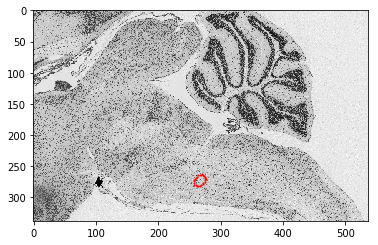

In [187]:
stack = 'MD585'
structure = '7n_R'

image_contour_generator(stack,structure,use_local_alignment = True,image_prep = image_prep)

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 10 ([11, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 12 ([38, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 88 ([19, 1]). Use the longest one.


Number of valid sections:
46
First valid section: 178
Last valid section: 223





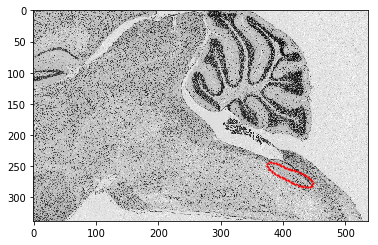

In [194]:
image_contour_generator(stack,structure='12N',use_local_alignment = True,image_prep = image_prep,threshold=0.1)

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
71
First valid section: 256
First valid section: 255





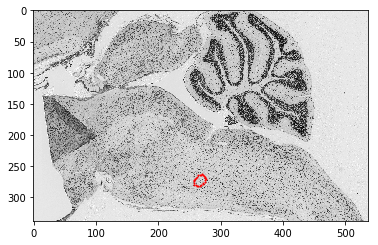

In [167]:
stack = 'MD585'
structure = '7n_R'

use_local_alignment = True
image_prep = 2

if use_local_alignment:
    # Load local transformed volumes
    str_alignment_spec = load_json(fn_vis_structures)[structure]
    local_vo = DataManager.load_transformed_volume_v2(alignment_spec = str_alignment_spec, 
                                                    return_origin_instead_of_bbox = True,
                                                   structure = structure)
else:
    # Load simple global volumes
    str_alignment_spec = load_json(fn_vis_global)
    simpleGlobal_vo = DataManager.load_transformed_volume_v2(alignment_spec = global_alignment_spec, 
                                                                 return_origin_instead_of_bbox = True,
                                                                structure = structure)


# Load collection of bounding boxes for every structure
registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners = \
        load_json(os.path.join(ROOT_DIR, 'CSHL_simple_global_registration', \
                                stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json'))
# Load cropping box for structure. Only need the valid min and max sections though
(_, _, secmin), (_, _, secmax) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[structure]
# Load range of sections for particular structure
valid_secmin = 1
valid_secmax = 999
section_margin = 50 # 1000um margin / 20um per slice
atlas_structures_wrt_wholebrainWithMargin_sections = \
    range(max(secmin - section_margin, valid_secmin), min(secmax + 1 + section_margin, valid_secmax))

# Choose thresholds for probability volumes
levels = [0.5, 0.9]


# LOAD CONTOURS FROM VOLUME (function defined below)
str_contour = get_structure_contours_from_structure_volumes_v3(volumes={structure: local_vo}, stack=stack, 
                                                     sections=atlas_structures_wrt_wholebrainWithMargin_sections,
                                                    resolution='10.0um', level=levels, sample_every=5)

# Check number sections that the contours are present on 
str_keys = str_contour.keys()
valid_sections = []

for key in str_keys:
    if isinstance(key,int) and key>1:
        valid_sections.append(key)
        # Need to check individual "levels" are on this section as well. 
        #    (0.1 threshold spans more slices than 0.9)
print 'Number of valid sections:'
num_valid_sections = len(valid_sections)
print num_valid_sections
print 'First valid section:',valid_sections[0]
print 'First valid section:',valid_sections[len(valid_sections)-1]
print '\n\n'

#print str_contour[ valid_sections[0] ][structure][ levels[0] ]



# LOAD prep5->prep2 cropbox
if image_prep==5:
    # wholeslice_to_brainstem = -from_padded_to_wholeslice, from_padded_to_brainstem
    ini_fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/operation_configs/from_padded_to_brainstem.ini'
    with open(ini_fp,'r') as fn:
        contents_list = fn.read().split('\n')
    for line in contents_list:
        if 'rostral_limit' in line:
            rostral_limit = int( line.split(' ')[2] )
        if 'dorsal_limit' in line:
            dorsal_limit = int( line.split(' ')[2] )
    ini_fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/operation_configs/from_padded_to_wholeslice.ini'
    with open(ini_fp,'r') as fn:
        contents_list = fn.read().split('\n')
    for line in contents_list:
        if 'rostral_limit' in line:
            rostral_limit = rostral_limit - int( line.split(' ')[2] )
        if 'dorsal_limit' in line:
            dorsal_limit = dorsal_limit - int( line.split(' ')[2] )
    rostral_limit = rostral_limit
    dorsal_limit = dorsal_limit
    # DONE LOADING PREP5 OFFSETS
elif image_prep==2:
    rostral_limit = 0
    dorsal_limit = 0
        
# PLOT Contours
contour_str = str_contour[ valid_sections[num_valid_sections/2] ][structure][ levels[0] ]
# Downsample
y_len, x_len = np.shape(contour_str)
x_list = []
y_list = []
for y in range(y_len):
    x_list.append(rostral_limit + contour_str[y][0]/32)
    y_list.append(dorsal_limit + contour_str[y][1]/32)
        
# PLOT Structure overlayed on thumbnail image
sorted_fns = DataManager.load_sorted_filenames(stack=stack)[0].keys()
# fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=5, resol='thumbnail', version='gray', fn=sorted_fns[int(len(sorted_fns)/2)])
fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=image_prep, resol='thumbnail', version='gray', fn=sorted_fns[30])
img = imread(fp)

plt.imshow( img, cmap='gray' )
plt.scatter(x_list,y_list,s=1, color='r')
plt.show()

In [ ]:
# wholeslice_to_brainstem = -from_padded_to_wholeslice, from_padded_to_brainstem

#from_padded_to_wholeslice
rostral_limit = 50
caudal_limit = 1188
dorsal_limit = 21
ventral_limit = 738

#from_padded_to_brainstem
rostral_limit = 521
caudal_limit = 1057
dorsal_limit = 128
ventral_limit = 465

In [53]:
def get_structure_contours_from_structure_volumes_v3(volumes, stack, sections, 
                                                     resolution, level, sample_every=1,
                                                    use_unsided_name_as_key=False):
    """
    Re-section atlas volumes and obtain structure contours on each section.
    Resolution of output contours are in volume resolution.
    v3 supports multiple levels.

    Args:
        volumes (dict of (3D array, 3-tuple)): {structure: (volume, origin_wrt_wholebrain)}. volume is a 3d array of probability values.
        sections (list of int):
        resolution (int): resolution of input volumes.
        level (float or dict or dict of list): the cut-off probability at which surfaces are generated from probabilistic volumes. Default is 0.5.
        sample_every (int): how sparse to sample contour vertices.

    Returns:
        Dict {section: {name_s: contour vertices}}.
    """

    from collections import defaultdict
    
    structure_contours_wrt_alignedBrainstemCrop_rawResol = defaultdict(lambda: defaultdict(dict))

    converter = CoordinatesConverter(stack=stack, section_list=metadata_cache['sections_to_filenames'][stack].keys())

    converter.register_new_resolution('structure_volume', resol_um=convert_resolution_string_to_um(resolution=resolution, stack=stack))
    converter.register_new_resolution('image', resol_um=convert_resolution_string_to_um(resolution='raw', stack=stack))
    
    for name_s, (structure_volume_volResol, origin_wrt_wholebrain_volResol) in volumes.iteritems():

        converter.derive_three_view_frames(name_s, 
        origin_wrt_wholebrain_um=convert_resolution_string_to_um(resolution=resolution, stack=stack) * origin_wrt_wholebrain_volResol,
        zdim_um=convert_resolution_string_to_um(resolution=resolution, stack=stack) * structure_volume_volResol.shape[2])

        positions_of_all_sections_wrt_structureVolume = converter.convert_frame_and_resolution(
        p=np.array(sections)[:,None],
        in_wrt=('wholebrain', 'sagittal'), in_resolution='section',
        out_wrt=(name_s, 'sagittal'), out_resolution='structure_volume')[..., 2].flatten()
            
        structure_ddim = structure_volume_volResol.shape[2]
        
        valid_mask = (positions_of_all_sections_wrt_structureVolume >= 0) & (positions_of_all_sections_wrt_structureVolume < structure_ddim)
        if np.count_nonzero(valid_mask) == 0:
#             sys.stderr.write("%s, valid_mask is empty.\n" % name_s)
            continue

        positions_of_all_sections_wrt_structureVolume = positions_of_all_sections_wrt_structureVolume[valid_mask]
        positions_of_all_sections_wrt_structureVolume = np.round(positions_of_all_sections_wrt_structureVolume).astype(np.int)
        
        if isinstance(level, dict):
            level_this_structure = level[name_s]
        else:
            level_this_structure = level

        if isinstance(level_this_structure, float):
            level_this_structure = [level_this_structure]
                        
        for one_level in level_this_structure:

            contour_2d_wrt_structureVolume_sectionPositions_volResol = \
            find_contour_points_3d(structure_volume_volResol >= one_level,
                                    along_direction='sagittal',
                                    sample_every=sample_every,
                                    positions=positions_of_all_sections_wrt_structureVolume)

            for d_wrt_structureVolume, cnt_uv_wrt_structureVolume in contour_2d_wrt_structureVolume_sectionPositions_volResol.iteritems():

                contour_3d_wrt_structureVolume_volResol = np.column_stack([cnt_uv_wrt_structureVolume, np.ones((len(cnt_uv_wrt_structureVolume),)) * d_wrt_structureVolume])

    #             contour_3d_wrt_wholebrain_uv_rawResol_section = converter.convert_frame_and_resolution(
    #                 p=contour_3d_wrt_structureVolume_volResol,
    #                 in_wrt=(name_s, 'sagittal'), in_resolution='structure_volume',
    #                 out_wrt=('wholebrain', 'sagittal'), out_resolution='image_image_section')

                contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section = converter.convert_frame_and_resolution(
                    p=contour_3d_wrt_structureVolume_volResol,
                    in_wrt=(name_s, 'sagittal'), in_resolution='structure_volume',
                    out_wrt=('wholebrainXYcropped', 'sagittal'), out_resolution='image_image_section')

                assert len(np.unique(contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[:,2])) == 1
                sec = int(contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[0,2])

                if use_unsided_name_as_key:
                    name = convert_to_unsided_label(name_s)
                else:
                    name = name_s

                structure_contours_wrt_alignedBrainstemCrop_rawResol[sec][name][one_level] = contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[..., :2]
        
    return structure_contours_wrt_alignedBrainstemCrop_rawResol